# Solving OneMax problem using Genetic algorithm

OneMax Problem: The OneMax (or One-Max) problem is a simple optimization task
that is often used as the Hello World of genetic algorithm frameworks. The OneMax task is to find the binary string of a given length that maximizes the sum of its digits.

DEAP library: DEAP is a novel evolutionary computation framework for rapid
prototyping and testing of ideas. It seeks to make algorithms explicit and data
structures transparent. It works in perfect harmony with parallelisation mechanisms such as multiprocessing and SCOOP

# Install library

In [1]:
pip install deap

# Import required libraries

Module description:
1. random : This module implements pseudo-random number generators for various distributions.

2. base : The base module provides basic structures to build evolutionary algorithms. It contains the Toolbox , useful to store evolutionary operators, and a virtual Fitness class used as base class, for the fitness member of any individual.

3. creator : The creator is a meta-factory allowing to create classes that will fulfill the needs of your evolutionary algorithms. In effect, new classes can be built from any imaginable type, from list to set , dict , PrimitiveTree and more, providing the possibility to implement genetic algorithms, genetic programming, evolution strategies, particle swarm optimizers, and many more.

4. tools : The tools module contains the operators for evolutionary algorithms. They are used to modify, select and move the individuals in their environment. The set of operators it contains are readily usable in the Toolbox . In addition to the basic operators this module also contains utility tools to enhance the basic algorithms with Statistics , HallOfFame , and History .

5. algorithms : The algorithms module is intended to contain some specific algorithms in order to execute very common evolutionary algorithms. The method used here are more for convenience than reference as the implementation of every evolutionary algorithm may vary infinitely. Most of the algorithms in this module use operators registered in the toolbox. Generally, the keyword used are mate() forcrossover, mutate() for mutation, select() for selection and evaluate() for evaluation.

In [2]:
import random
from deap import base, creator, tools, algorithms

# Type Creation

The objective of the OneMax problem is to have a binary string with as many ones as possible. Thus we need a maximizing fitness and a individual that is a sorted container, we'll choose the standard list .
Type creation is done by calling the function create() in the creator module. This function takes two mandatory arguments and additional optional arguments. The first argument is the actual name of the type that we want to create. The second argument is the base classe that the new type created should inherit from. Finally, the optional arguments are members to add to the new type.

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

The first line creates a maximizing fitness by replacing, in the base type Fitness , the pure virtual weights attribute by (1.0,) that means to maximize a single objective fitness. The second line creates an Individual class that inherits the properties of list and has a fitness attribute of the type FitnessMax that was just created.

Single objective is considered by DEAP the same way a multi objective function would but with a single value. The weights (as well as the returned value from the evaluation) are always required to be iterable.

The created classes are made available in the creator module. We can instantiate directly objects of the created class as follows. This step is not required in an algorithm as the instatiation will be automated later.

# Instantiating an Individual

In [4]:
ind = creator.Individual([1, 0, 1, 1, 0])
print(ind)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


# Toolbox

The toolbox is intended to store functions with their arguments under standard aliases for
uses in algorithms. Functions are registered by a function call with two mandatory
arguments, the alias to give to the function and the function it will be associate with. Any
additional argument will be given as argument when the alias is called.

In [5]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In the above block of code we have created a toolbox object and registered three functions. This first one, attr_bool , calls randint from the random module with arguments (0, 1) to create an integer in the interval . The second function, individual , when called, will use the initRepeat function made available in the tools module to fill an Individual class with what is produced by 10 calls to the previously defined attr_bool function. The same thing is done for the population function.

For example, calling every function individually shows how it proceeds:

In [6]:
bit = toolbox.attr_bool()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

bit is of type <class 'int'> and has value
0
ind is of type <class 'deap.creator.Individual'> and contains 10 bits
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1]
pop is of type <class 'list'> and contains 3 individuals
[[0, 0, 1, 1, 1, 0, 1, 0, 1, 1], [0, 0, 1, 1, 1, 1, 1, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]


# Evaluation function

The evaluation function is pretty simple for the OneMax problem, we need to count the number of ones in an individual. We recall here that the returned value must be an iterable of length equal to the number of objectives (weights).

In [7]:
def evalOneMax(individual):
    return sum(individual),

# Genetic Operators

In [8]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

The evaluation is given the alias evaluate. Having a single argument being the individual to evaluate we don’t need to fix any, the individual will be given later in the algorithm. The two points crossover function is registered the same way under the alias mate. The mutation, for its part, needs an argument to be fixed (the independent probability of each attribute to be mutated indpb). In the algorithms the mutate() function is called with the signature toolbox.mutate(mutant). This is the most convenient way because each mutation takes a different number of arguments, having those arguments fixed in the toolbox leave open most of the possibilities to change the mutation (crossover, selection, or evaluation) operator later in your researches. Finally, the selection operator is registered under the name select and the size of the tournament set to 3.

We can for example mutate an individual and expect 10% of its attributes to be flipped.

In [9]:
ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[1, 0, 1, 0, 0, 0, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 1]


The operators execute their behaviour on the individuals in place, meaning that if the individual is not copied before modified the old individual is lost. Copying an individual is done with the clone function available in every toolbox.

In [10]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)

False
True


# Evolving the population

The main program shall be defined in a main function. All previous declarations are put in the global scope of the module to make created objects available for further use in other user experiments.

The main program is very simple. It consists of generating a population, and giving it to the algorithm for it to evolve a solution. Here we will employ some helpful introspection tools such as Statistics and a Hall of Fame. The statistics are computed using numpy functions on the population, and the hall of fame keeps track of the best individuals that ever appeared during the evolution. The algorithm take as arguments, among other, the population and the toolbox. Once the evolution is finished the population contains the individuals from the last generation.

In [11]:
def main():
    import numpy
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

Next, we protect our call to the main function and launch the evolution, the verbose argument tell to output the stats on every generations. We can print and plot the data returned.

gen	nevals	avg 	min	max
0  	50    	4.74	2  	8  
1  	34    	6.08	4  	9  
2  	33    	6.98	4  	9  
3  	37    	7.84	5  	10 
4  	34    	8.44	5  	10 
5  	34    	9   	6  	10 
6  	29    	9.42	7  	10 
7  	29    	9.7 	7  	10 
8  	27    	9.86	8  	10 
9  	21    	9.86	8  	10 
10 	23    	9.86	7  	10 
Best individual is: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
with fitness: (10.0,)


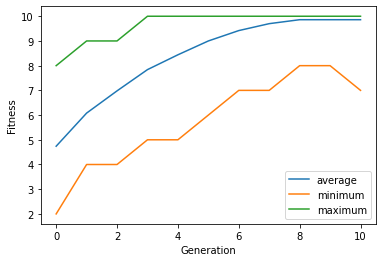

In [12]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()